In [2]:
#import libraries
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white', color_codes=True)

In [3]:
#load data
path = './input/'
train_df = pd.read_csv(path +'train.csv')
train_df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
#By intuition, ignore these columns for now
train_df.drop(['PassengerId','Name','Ticket'],axis =1, inplace = True)

** Show how many instances, features, and missing values.**

In [6]:
print(train_df.shape,'\n')
train_df.count()

(891, 9) 



Survived    891
Pclass      891
Sex         891
Age         714
SibSp       891
Parch       891
Fare        891
Cabin       204
Embarked    889
dtype: int64

**Since Cabin has too many missing values, ingore it. **

In [7]:
train_df.drop('Cabin',axis =1, inplace = True)

In [8]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


### Now discover the relation between our target, Survived, and other columns ###
**The higher the class, the higher the survival rate. **

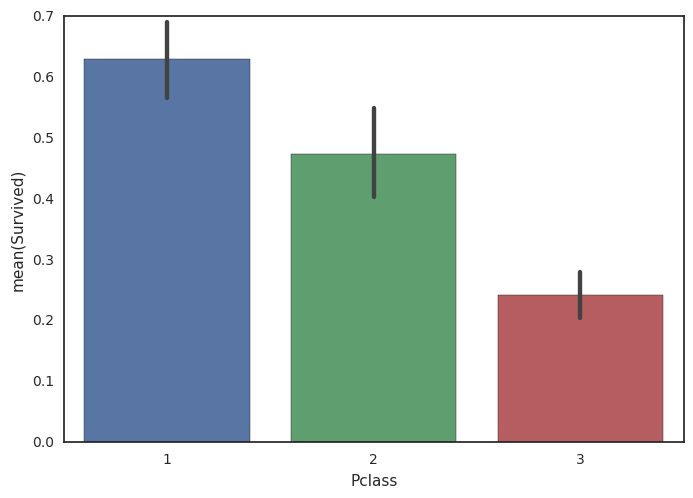

In [9]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

** Female has much higher survival rate than male has. **

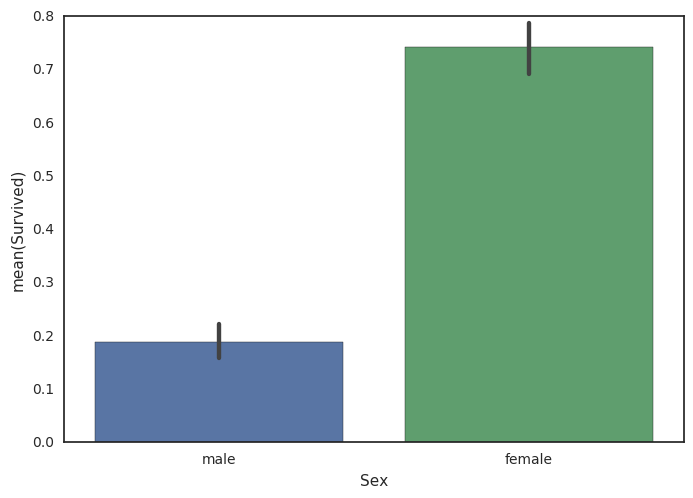

In [10]:
sns.barplot(x='Sex', y='Survived', data=train_df);

**Combine Pclass and Sex together. <br>
Even female in the lower class has low survival rate. **

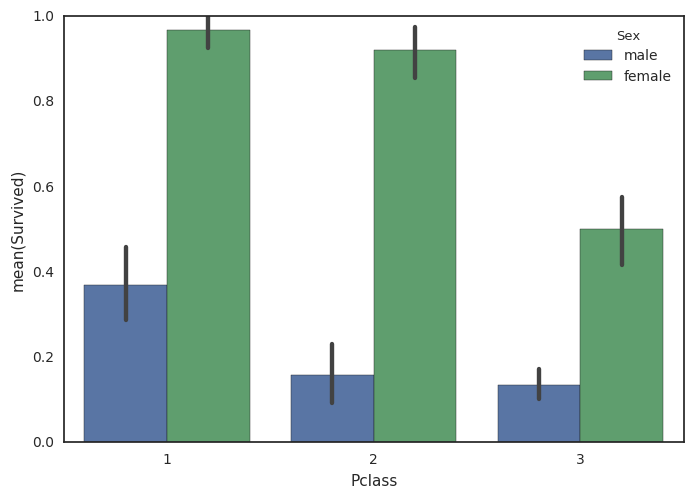

In [11]:
sns.barplot(x='Pclass', y='Survived',hue='Sex' ,data=train_df);

**Histogram of Age: people below 15 have very high survival rate. **

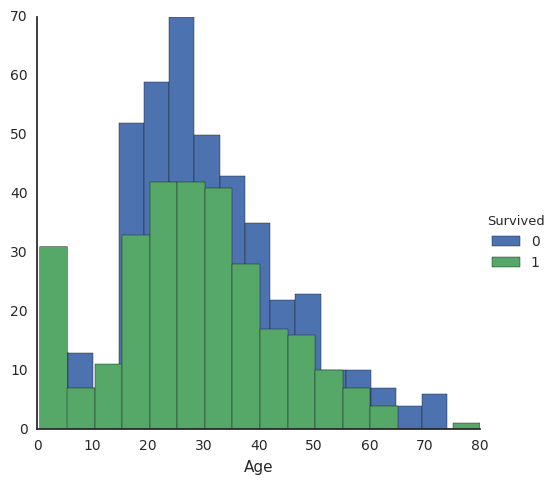

In [12]:
g = sns.FacetGrid(train_df[train_df.Age.notnull()], hue='Survived',size = 5)
g.map(plt.hist, 'Age',bins = 16)
g.add_legend();

**Combine Sex and Age together. <br>
The diagram shows that female and age below 15 could possibly survive. **

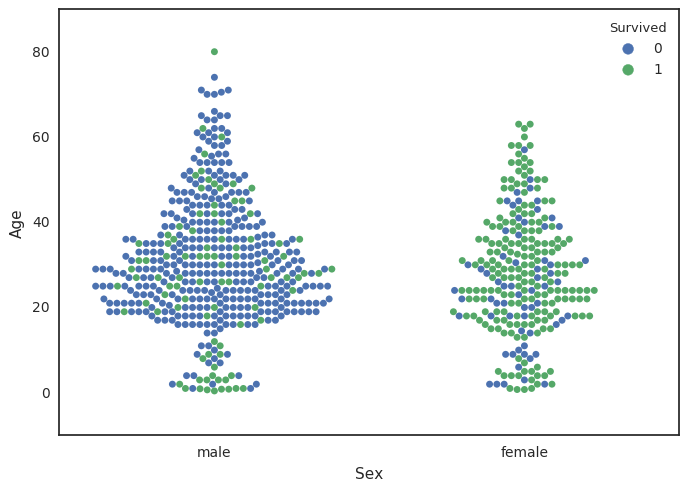

In [13]:
sns.swarmplot(x='Sex', y='Age', hue='Survived', data=train_df);

**Can't see strong relation between SibSp and survival rate. **

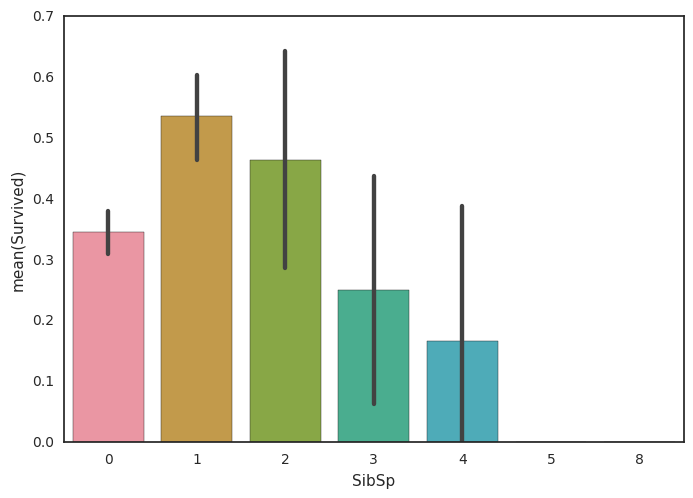

In [14]:
sns.barplot(x='SibSp', y='Survived', data=train_df);

**Therefore, create a new column, SibSp_True, to determine whether a passenger has siblings or spouse also aboard Titanic. <br>
The result shows that people who have siblings or spouse also aboard have higher survival rate. **

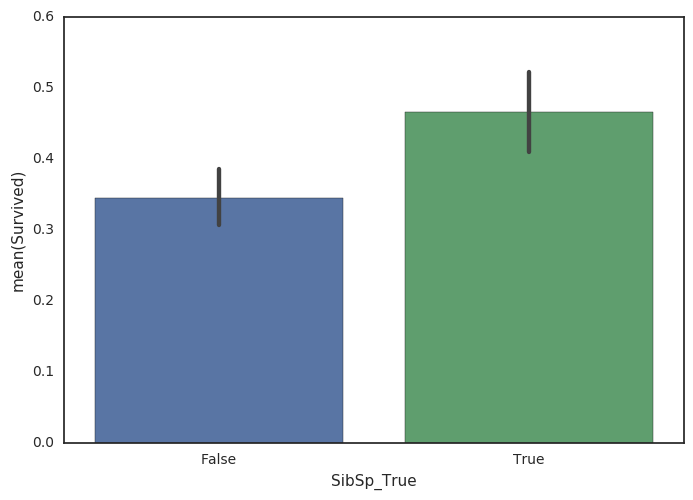

In [15]:
train_df['SibSp_True'] = train_df['SibSp']>0
sns.barplot(x ='SibSp_True',y='Survived', data=train_df);

**Can't see strong relation between Parch and survival rate. **

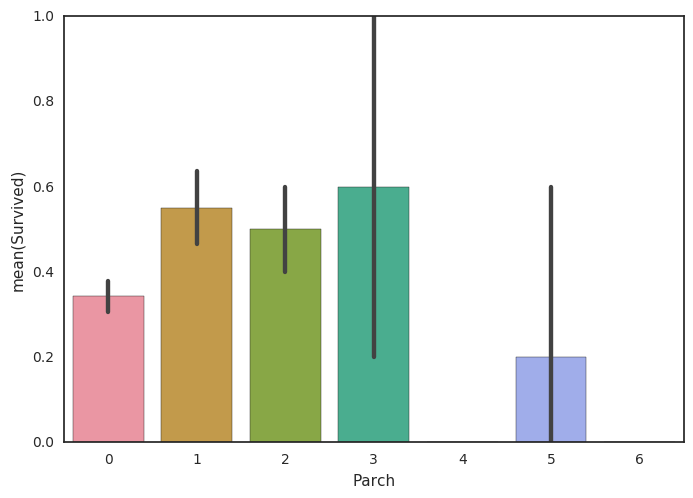

In [16]:
sns.barplot(x='Parch', y='Survived', data=train_df);

**Therefore, create a new column, Parch_True, to determine whether a passenger has parents or children also aboard Titanic. <br>
The result shows that people who have parents or children also aboard have higher survival rate.**

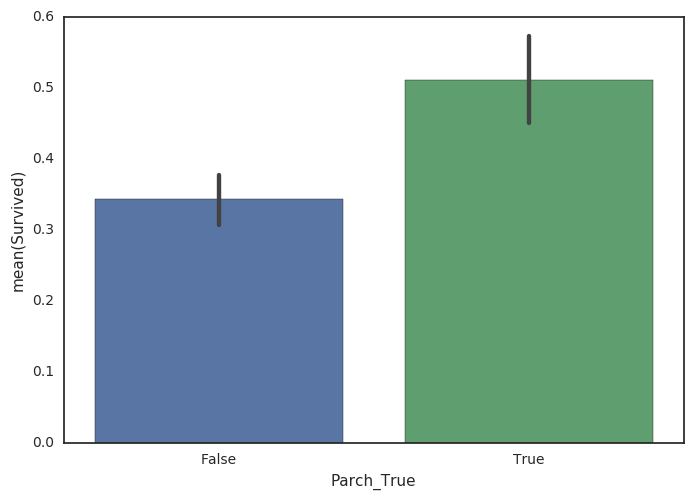

In [17]:
train_df['Parch_True'] = train_df['Parch'] >0
sns.barplot(x ='Parch_True',y='Survived', data=train_df);

**Higher the Fare, higher the survival rate. **

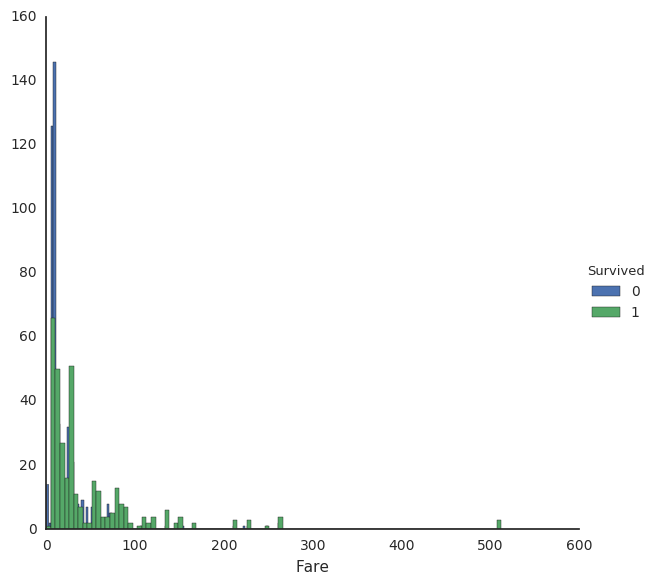

In [18]:
g = sns.FacetGrid(train_df, hue='Survived',size = 6)
g.map(plt.hist, 'Fare',bins = 100)
g.add_legend();

** Surprisingly, passengers who embarked from Cherbourg have higher survival rate **

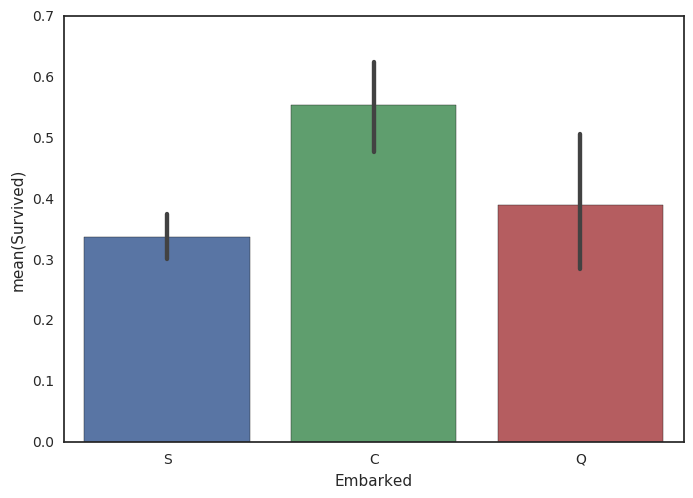

In [19]:
sns.barplot(x ='Embarked',y='Survived', data=train_df);

** Check the proportion of Sex to Embarked. <br>
It's reasonable that passengers from S has lower survival rate since there are much more males than females. **

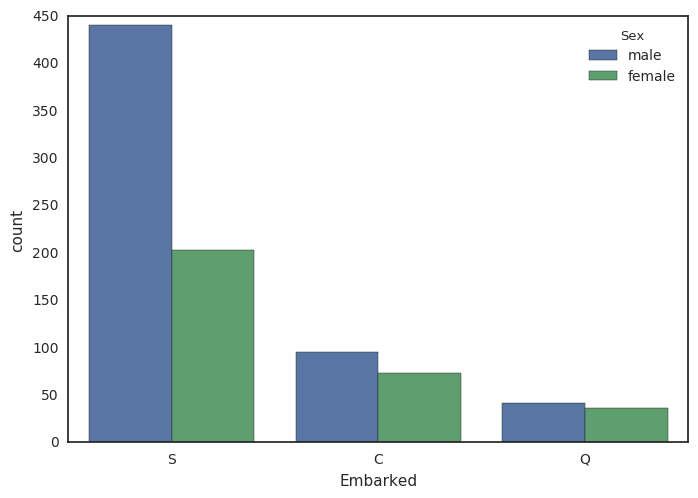

In [20]:
sns.countplot(x='Embarked',hue='Sex',data=train_df)

**Check the proportion of Pclass to Embarked. <br>
It's reasonable that passengers from C has higher survival rate since there are much more upper class.**

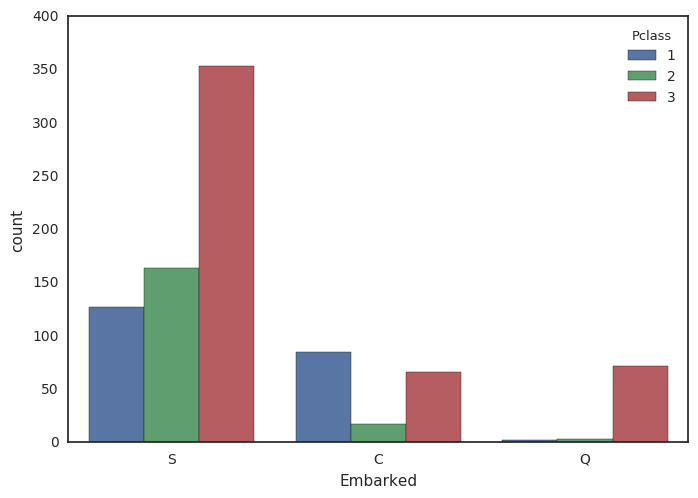

In [21]:
sns.countplot(x='Embarked',hue='Pclass',data=train_df)

### End Note ###
** As a result, I decide to use Pclass, Sex, Age, SibSp_True, Parch_True, and Fare to build the first machine learning model. **